<a href="https://colab.research.google.com/github/nermienkh/pulse2percept/blob/master/pulse2percept_Implants%26Grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
#@title Implants preparation
#install library
!pip install pulse2percept
#import libraries
import pulse2percept as p2p
from pulse2percept.stimuli import ImageStimulus
#list of  visual feild maps
transforms = [p2p.utils.Curcio1990Map, p2p.utils.Watson2014Map,p2p.utils.Watson2014DisplaceMap]
'''
#references:
 https://pulse2percept.readthedocs.io/en/stable/topics/models.html Computational Models
 https://pulse2percept.readthedocs.io/en/stable/examples/models/plot_beyeler2019_scoreboard.html scoreboard model
'''
#Initialize computation models with all parameters adjusted to fill the gray grid (representing the extent of the visual field to be simulated ,xrange,yrange). the grey located beneath the electrodes depicted in the figures below.
#xystep represents the sample the visual field fixed step size
modelp2pArgusII = p2p.models.ScoreboardSpatial(xrange=(-10,10), yrange=(-6,6),xystep=0.25,retinotopy=transforms[1],rho=70,grid_type ='rectangular')
modelp2p16 = p2p.models.ScoreboardSpatial(xrange=(-17,17), yrange=(-17,17),xystep=0.25,retinotopy=transforms[1],rho=70,grid_type ='rectangular')
modelp2p32 = p2p.models.ScoreboardSpatial(xrange=(-16,16), yrange=(-16,16),xystep=0.25,retinotopy=transforms[1],rho=70,grid_type ='rectangular')
modelp2pAlpha = p2p.models.ScoreboardSpatial(xrange=(-5,5), yrange=(-5,5),xystep=0.25,retinotopy=transforms[1],rho=70,grid_type ='rectangular')
#AxonMap Model
#modelaxo=p2p.models.AxonMapSpatial(xrange=(-3,3), yrange=(-3,3),xystep=1)

#build the Computantional models
modelp2pArgusII.build()
modelp2p16.build()
modelp2p32.build()
modelp2pAlpha.build()
#modelaxo.build()


#initialize Implants
from pulse2percept.implants import ArgusII, AlphaAMS
#argusIIImplant = ArgusII(x=0, y=0, z=100, rot=5)
#alphaAMSImplant= AlphaAMS(x=0, y=0, z=100, rot=5)
argusIIImplant = ArgusII(x=0, y=0)
alphaAMSImplant= AlphaAMS(x=0, y=0)

#Implant16
implant16 = {};
spacing = 575
radius =  225
egrid = p2p.implants.ElectrodeGrid((16,16), spacing, etype=p2p.implants.DiskElectrode,r=radius)
implant16 = p2p.implants.ProsthesisSystem(egrid)

#Implant32
implant32 = {};
spacing = 280
radius =  35
egrid = p2p.implants.ElectrodeGrid((32,32), spacing, etype=p2p.implants.DiskElectrode, r=radius)
implant32 = p2p.implants.ProsthesisSystem(egrid)

## Ploting implant on grid

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

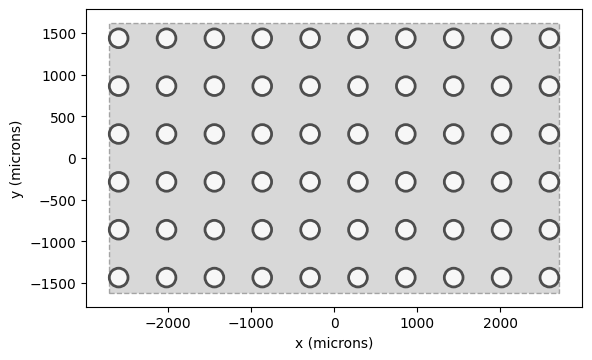

In [94]:
modelp2pArgusII.plot()
argusIIImplant.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

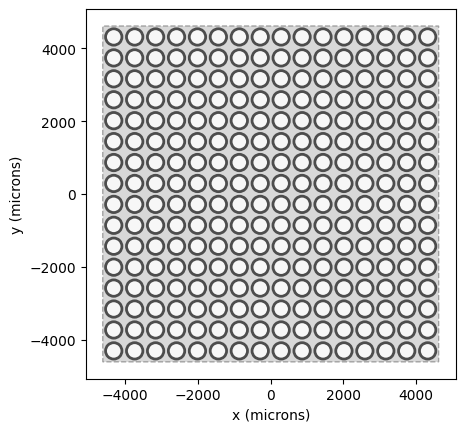

In [92]:
implant16.plot()
modelp2p16.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

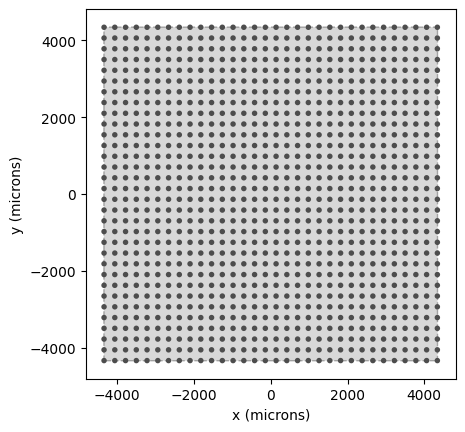

In [75]:
implant32.plot()
modelp2p32.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

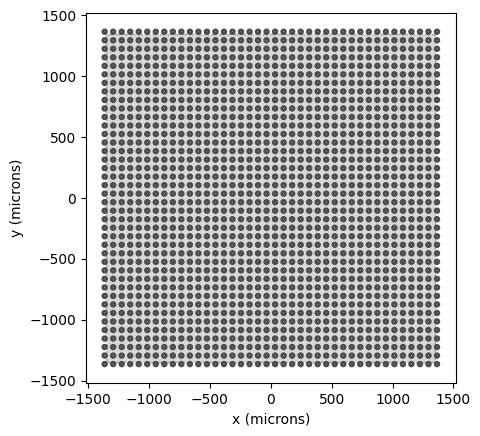

In [98]:
modelp2pAlpha.plot()
alphaAMSImplant.plot()

##Concrete Example

In [117]:
#Create Image stimulus
stim  = p2p.stimuli.LogoBVL()
#Resize object to implant shape
implantx= argusIIImplant
modelx=modelp2pArgusII
if (isinstance(implantx,p2p.implants.base.ProsthesisSystem)):
  implantx.stim= stim.resize(implantx.earray.shape)
else:
  implantx.stim= stim.resize(implantx.shape)
#pass implantto the model’s predict_percept method:
#percept_gray = modelp2p.predict_percept(implantx)
percept_gray = modelx.predict_percept(implantx)

In [118]:
percept_gray.data.shape

(49, 81, 1)

<Axes: xlabel='x (degrees of visual angle)', ylabel='y (degrees of visual angle)'>

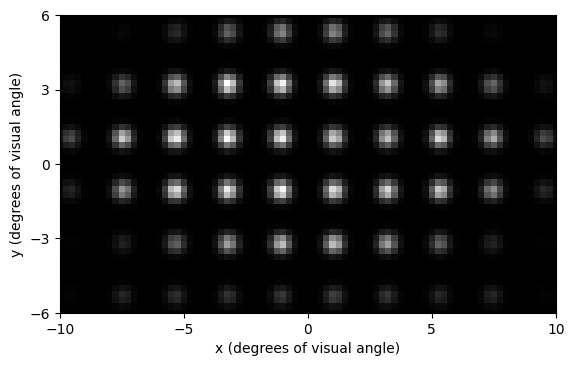

In [119]:
percept_gray.plot()